# Banxi Site Analysis

In [1]:
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag

import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import numpy as np

## Functions

In [2]:
def list_components(df):
    components = []
    for i in range(len(df.index)):
        if df['dir_comp_name'][i] not in components:
            components.append(df['dir_comp_name'][i])
    print(components)

In [3]:
def specimen_plot(site, comp):
    site_specimens = specimens[specimens['site']==site].copy()

    site_tc = site_specimens[site_specimens['dir_tilt_correction']==100]
    site_is = site_specimens[site_specimens['dir_tilt_correction']==0]
    
    if comp == 'LT':
        site_tc_comp = site_tc[(site_tc['dir_comp']=='LT')|(site_tc['dir_comp']=='MT')]
        site_is_comp = site_is[(site_is['dir_comp']=='LT')|(site_is['dir_comp']=='MT')]
    elif comp =='HT':
        site_tc_comp = site_tc[site_tc['dir_comp']=='HT']
        site_is_comp = site_is[site_is['dir_comp']=='HT']
    else:
        print('pick LT or HT')
        
    site_tc_comp_dec_vec = site_tc_comp[site_tc_comp['dir_bfv_dec'].isnull()]['dir_dec'].tolist()
    site_tc_comp_inc_vec = site_tc_comp[site_tc_comp['dir_bfv_dec'].isnull()]['dir_inc'].tolist()
    
    site_is_comp_dec_vec = site_is_comp[site_is_comp['dir_bfv_dec'].isnull()]['dir_dec'].tolist()
    site_is_comp_inc_vec = site_is_comp[site_is_comp['dir_bfv_dec'].isnull()]['dir_inc'].tolist()
    
    site_tc_comp_dec_bfv = site_tc_comp[~site_tc_comp['dir_bfv_dec'].isnull()]['dir_bfv_dec'].tolist()
    site_tc_comp_inc_bfv = site_tc_comp[~site_tc_comp['dir_bfv_dec'].isnull()]['dir_bfv_inc'].tolist()
    
    site_is_comp_dec_bfv = site_is_comp[~site_is_comp['dir_bfv_dec'].isnull()]['dir_bfv_dec'].tolist()
    site_is_comp_inc_bfv = site_is_comp[~site_is_comp['dir_bfv_dec'].isnull()]['dir_bfv_inc'].tolist()
    
    site_tc_comp_dec = site_tc_comp_dec_vec + site_tc_comp_dec_bfv
    site_tc_comp_inc = site_tc_comp_inc_vec + site_tc_comp_inc_bfv
    
    site_is_comp_dec = site_is_comp_dec_vec + site_is_comp_dec_bfv
    site_is_comp_inc = site_is_comp_inc_vec + site_is_comp_inc_bfv
    
    site_tc_comp_mean = ipmag.fisher_mean(site_tc_comp_dec, site_tc_comp_inc)
    site_is_comp_mean = ipmag.fisher_mean(site_is_comp_dec, site_is_comp_inc)
    
    print('n vectors = {}'.format(len(site_tc_comp_dec_vec)))
    print('n planes  = {}'.format(len(site_tc_comp_dec_bfv)))
    
    if len(site_tc_comp_dec)>1:
        print('tilt-corrected alpha95 = {:.2f}'.format(site_tc_comp_mean['alpha95']))
        print('geographic     alpha95 = {:.2f}'.format(site_is_comp_mean['alpha95']))
    
    fignum = 1
    plt.figure(num=fignum,figsize=(5,5))
    ipmag.plot_net(fignum)
    
    ipmag.plot_di(site_tc_comp_dec_vec, site_tc_comp_inc_vec,
                  color='C0', marker='o', label='tilt-corrected vector')
    ipmag.plot_di(site_tc_comp_dec_bfv, site_tc_comp_inc_bfv,
                  color='C0', marker='^', label='tilt-corrected plane')
    ipmag.plot_di(site_is_comp_dec_vec, site_is_comp_inc_vec,
                  color='C1', marker='o', label='geographic vector')
    ipmag.plot_di(site_is_comp_dec_bfv, site_is_comp_inc_bfv,
                  color='C1', marker='^', label='geographic plane')
    
    if len(site_tc_comp_dec)>1:
        ipmag.plot_di_mean(site_tc_comp_mean['dec'], site_tc_comp_mean['inc'], site_tc_comp_mean['alpha95'],
                           color='k', marker='s')
        ipmag.plot_di_mean(site_is_comp_mean['dec'], site_is_comp_mean['inc'], site_is_comp_mean['alpha95'],
                           color='k', marker='s')
    
    plt.title(comp)
    plt.legend(loc='middle left', bbox_to_anchor=(1.02,0.5))
    plt.show()

## Data

Read in data:

In [4]:
sites1 = pd.read_csv('PM_data1/sites.txt',sep='\t',header=1)
sites2 = pd.read_csv('PM_data2/sites.txt',sep='\t',header=1)
sites3 = pd.read_csv('PM_data3/sites.txt',sep='\t',header=1)

In [5]:
specimens1 = pd.read_csv('PM_data1/specimens.txt',sep='\t',header=1)
specimens2 = pd.read_csv('PM_data2/specimens.txt',sep='\t',header=1)
specimens3 = pd.read_csv('PM_data3/specimens.txt',sep='\t',header=1)

In [6]:
samples1 = pd.read_csv('PM_data1/samples.txt',sep='\t',header=1)
samples2 = pd.read_csv('PM_data2/samples.txt',sep='\t',header=1)
samples3 = pd.read_csv('PM_data3/samples.txt',sep='\t',header=1)

In [7]:
list_components(sites1)

['HT', 'MT', 'LT']


In [8]:
list_components(sites2)

['HT', 'LT']


In [9]:
list_components(sites3)

['HT', 'LT']


Merge data into a single dataframe:

In [10]:
sites = pd.concat([sites1, sites2, sites3], ignore_index=True)
sites.columns

Index(['site', 'location', 'samples', 'specimens', 'age', 'age_high',
       'age_low', 'age_sigma', 'age_unit', 'dir_alpha95', 'dir_comp_name',
       'dir_dec', 'dir_inc', 'dir_k', 'dir_n_samples', 'dir_n_specimens_lines',
       'dir_n_specimens_planes', 'dir_polarity', 'dir_r',
       'dir_tilt_correction', 'lat', 'lon', 'analysts', 'criteria',
       'software_packages', 'citations', 'method_codes', 'result_quality',
       'result_type', 'vgp_dm', 'vgp_dp', 'vgp_lat', 'vgp_lon',
       'dir_n_specimens'],
      dtype='object')

In [11]:
specimens = pd.concat([specimens1, specimens2, specimens3], ignore_index=True)
specimens.columns

Index(['specimen', 'experiments', 'sample', 'dir_alpha95', 'dir_bfv_dec',
       'dir_bfv_inc', 'dir_comp', 'dir_dec', 'dir_inc', 'dir_n_comps',
       'dir_n_measurements', 'dir_tilt_correction', 'dir_dang', 'dir_mad_free',
       'meas_step_max', 'meas_step_min', 'meas_step_unit', 'analysts',
       'instrument_codes', 'software_packages', 'int_corr', 'citations',
       'method_codes', 'result_quality', 'volume', 'weight', 'location',
       'site'],
      dtype='object')

In [12]:
samples = pd.concat([samples1, samples2, samples3], ignore_index=True)
samples.columns

Index(['analysts', 'azimuth', 'azimuth_dec_correction', 'bed_dip',
       'bed_dip_direction', 'citations', 'dip', 'geologic_classes',
       'geologic_types', 'height', 'lithologies', 'method_codes', 'sample',
       'site'],
      dtype='object')

## Sites

In [13]:
site_list = sites['site'].unique()
site_list

array(['TR002', 'TR004', 'TR006', 'TR008', 'TR010', 'TR012', 'TR014',
       'TR018', 'TR020', 'TR022', 'TR024', 'TR026', 'TR035', 'TR036',
       'TR042', 'TR045', 'TR016', 'TR028', 'TR030', 'TR032', 'TR038',
       'TR040'], dtype=object)

### TR002

n vectors = 8
n planes  = 0
tilt-corrected alpha95 = 6.45
geographic     alpha95 = 6.45


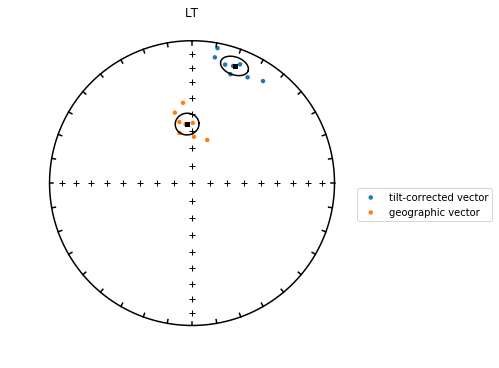

In [14]:
specimen_plot('TR002','LT')

n vectors = 5
n planes  = 3
tilt-corrected alpha95 = 11.92
geographic     alpha95 = 11.91


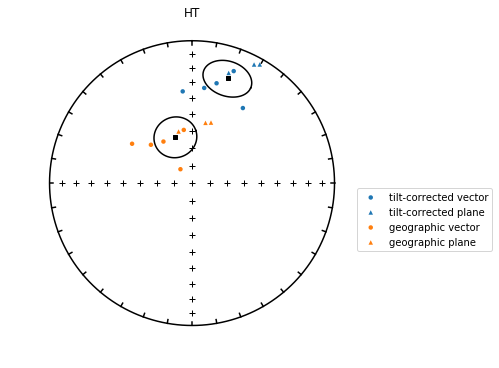

In [15]:
specimen_plot('TR002','HT')

### TR004

n vectors = 17
n planes  = 0
tilt-corrected alpha95 = 4.51
geographic     alpha95 = 4.51


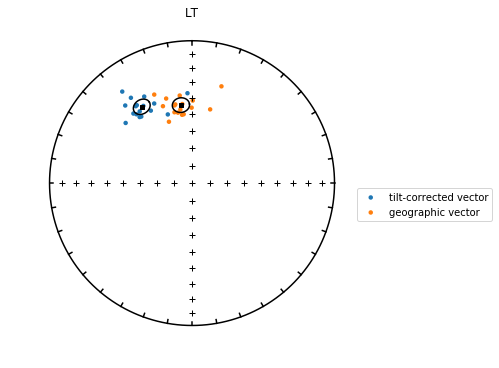

In [16]:
specimen_plot('TR004','LT')

n vectors = 12
n planes  = 3
tilt-corrected alpha95 = 57.24
geographic     alpha95 = 57.23


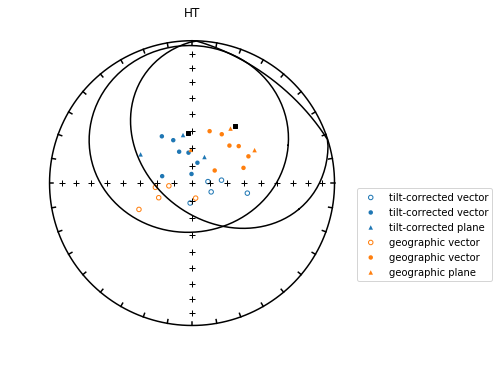

In [17]:
specimen_plot('TR004','HT')

This site has dual polarity - treat them as two different sites:

In [18]:
TR004_specimens = specimens[specimens['site']=='TR004'].copy()

TR004_tc = TR004_specimens[TR004_specimens['dir_tilt_correction']==100]
TR004_is = TR004_specimens[TR004_specimens['dir_tilt_correction']==0]

TR004_tc_HT = TR004_tc[TR004_tc['dir_comp']=='HT']
TR004_is_HT = TR004_is[TR004_is['dir_comp']=='HT']

TR004_tc_HT_dec_vec = TR004_tc_HT[TR004_tc_HT['dir_bfv_dec'].isnull()]['dir_dec'].tolist()
TR004_tc_HT_inc_vec = TR004_tc_HT[TR004_tc_HT['dir_bfv_dec'].isnull()]['dir_inc'].tolist()

TR004_is_HT_dec_vec = TR004_is_HT[TR004_is_HT['dir_bfv_dec'].isnull()]['dir_dec'].tolist()
TR004_is_HT_inc_vec = TR004_is_HT[TR004_is_HT['dir_bfv_dec'].isnull()]['dir_inc'].tolist()

TR004_tc_HT_dec_bfv = TR004_tc_HT[~TR004_tc_HT['dir_bfv_dec'].isnull()]['dir_bfv_dec'].tolist()
TR004_tc_HT_inc_bfv = TR004_tc_HT[~TR004_tc_HT['dir_bfv_dec'].isnull()]['dir_bfv_inc'].tolist()

TR004_is_HT_dec_bfv = TR004_is_HT[~TR004_is_HT['dir_bfv_dec'].isnull()]['dir_bfv_dec'].tolist()
TR004_is_HT_inc_bfv = TR004_is_HT[~TR004_is_HT['dir_bfv_dec'].isnull()]['dir_bfv_inc'].tolist()

TR004_tc_HT_dec = TR004_tc_HT_dec_vec + TR004_tc_HT_dec_bfv
TR004_tc_HT_inc = TR004_tc_HT_inc_vec + TR004_tc_HT_inc_bfv

TR004_is_HT_dec = TR004_is_HT_dec_vec + TR004_is_HT_dec_bfv
TR004_is_HT_inc = TR004_is_HT_inc_vec + TR004_is_HT_inc_bfv

TR004a_tc_HT_dec = []
TR004a_tc_HT_inc = []
TR004a_is_HT_dec = []
TR004a_is_HT_inc = []

TR004b_tc_HT_dec = []
TR004b_tc_HT_inc = []
TR004b_is_HT_dec = []
TR004b_is_HT_inc = []

for i in range(len(TR004_tc_HT_dec)):
    if TR004_tc_HT_inc[i] > 0:
        TR004a_tc_HT_dec.append(TR004_tc_HT_dec[i])
        TR004a_tc_HT_inc.append(TR004_tc_HT_inc[i])
        TR004a_is_HT_dec.append(TR004_is_HT_dec[i])
        TR004a_is_HT_inc.append(TR004_is_HT_inc[i])
    else:
        TR004b_tc_HT_dec.append(TR004_tc_HT_dec[i])
        TR004b_tc_HT_inc.append(TR004_tc_HT_inc[i])
        TR004b_is_HT_dec.append(TR004_is_HT_dec[i])
        TR004b_is_HT_inc.append(TR004_is_HT_inc[i])


TR004a_tc_HT_mean = ipmag.fisher_mean(TR004a_tc_HT_dec, TR004a_tc_HT_inc)
TR004a_is_HT_mean = ipmag.fisher_mean(TR004a_is_HT_dec, TR004a_is_HT_inc)

TR004b_tc_HT_mean = ipmag.fisher_mean(TR004b_tc_HT_dec, TR004b_tc_HT_inc)
TR004b_is_HT_mean = ipmag.fisher_mean(TR004b_is_HT_dec, TR004b_is_HT_inc)

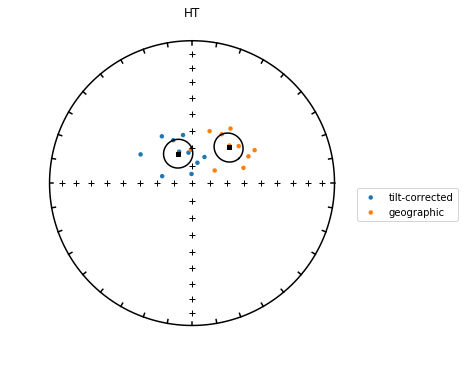

In [19]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)

ipmag.plot_di(TR004a_tc_HT_dec, TR004a_tc_HT_inc,
              color='C0', marker='o', label='tilt-corrected')
ipmag.plot_di(TR004a_is_HT_dec, TR004a_is_HT_inc,
              color='C1', marker='o', label='geographic')

ipmag.plot_di_mean(TR004a_tc_HT_mean['dec'], TR004a_tc_HT_mean['inc'], TR004a_tc_HT_mean['alpha95'],
                   color='k', marker='s')
ipmag.plot_di_mean(TR004a_is_HT_mean['dec'], TR004a_is_HT_mean['inc'], TR004a_is_HT_mean['alpha95'],
                   color='k', marker='s')

plt.title('HT')
plt.legend(loc='middle left', bbox_to_anchor=(1.02,0.5))
plt.show()

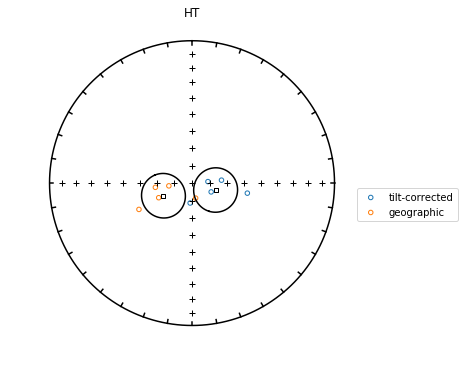

In [20]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)

ipmag.plot_di(TR004b_tc_HT_dec, TR004b_tc_HT_inc,
              color='C0', marker='o', label='tilt-corrected')
ipmag.plot_di(TR004b_is_HT_dec, TR004b_is_HT_inc,
              color='C1', marker='o', label='geographic')

ipmag.plot_di_mean(TR004b_tc_HT_mean['dec'], TR004b_tc_HT_mean['inc'], TR004b_tc_HT_mean['alpha95'],
                   color='k', marker='s')
ipmag.plot_di_mean(TR004b_is_HT_mean['dec'], TR004b_is_HT_mean['inc'], TR004b_is_HT_mean['alpha95'],
                   color='k', marker='s')

plt.title('HT')
plt.legend(loc='middle left', bbox_to_anchor=(1.02,0.5))
plt.show()

### TR006

n vectors = 15
n planes  = 0
tilt-corrected alpha95 = 4.95
geographic     alpha95 = 4.96


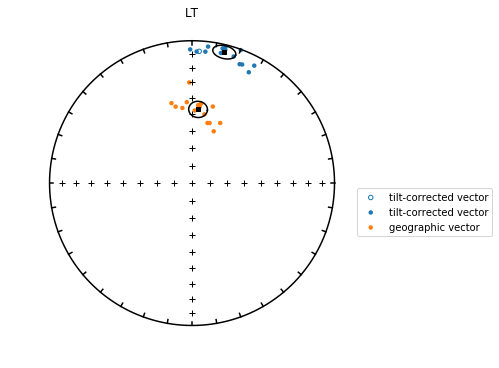

In [21]:
specimen_plot('TR006','LT')

n vectors = 19
n planes  = 2
tilt-corrected alpha95 = 24.06
geographic     alpha95 = 24.06


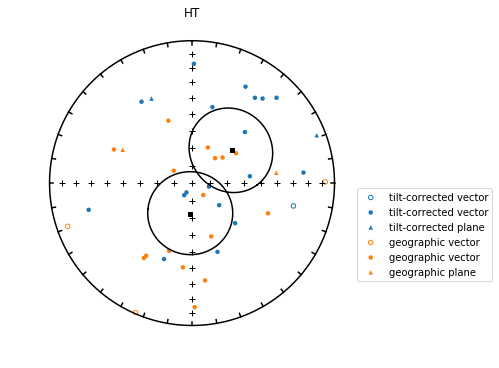

In [22]:
specimen_plot('TR006','HT')

### TR008

n vectors = 13
n planes  = 0
tilt-corrected alpha95 = 5.67
geographic     alpha95 = 5.67


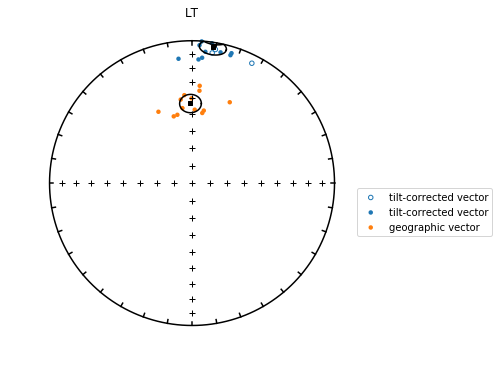

In [23]:
specimen_plot('TR008','LT')

n vectors = 6
n planes  = 0
tilt-corrected alpha95 = 78.47
geographic     alpha95 = 78.52


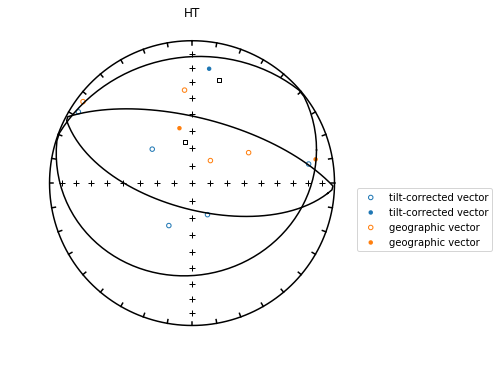

In [24]:
specimen_plot('TR008','HT')

### TR010

n vectors = 8
n planes  = 0
tilt-corrected alpha95 = 7.79
geographic     alpha95 = 7.80


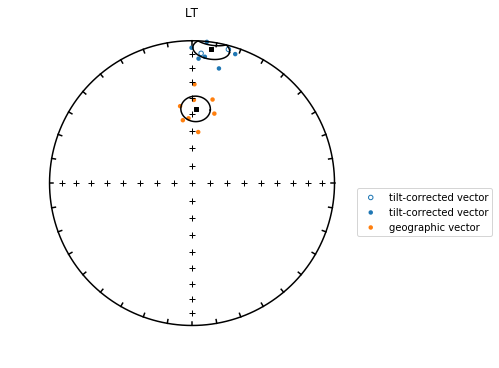

In [25]:
specimen_plot('TR010','LT')

n vectors = 12
n planes  = 0
tilt-corrected alpha95 = 32.79
geographic     alpha95 = 32.80


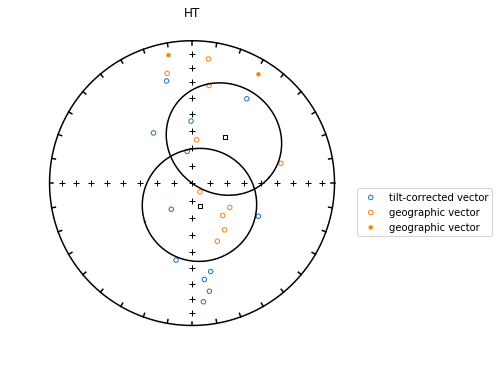

In [26]:
specimen_plot('TR010','HT')

### TR012

n vectors = 10
n planes  = 0
tilt-corrected alpha95 = 17.99
geographic     alpha95 = 17.99


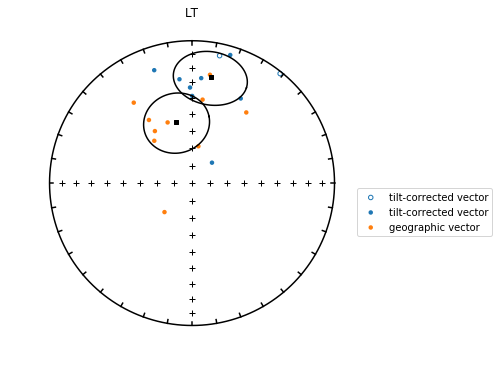

In [27]:
specimen_plot('TR012','LT')

n vectors = 15
n planes  = 0
tilt-corrected alpha95 = 38.28
geographic     alpha95 = 38.28


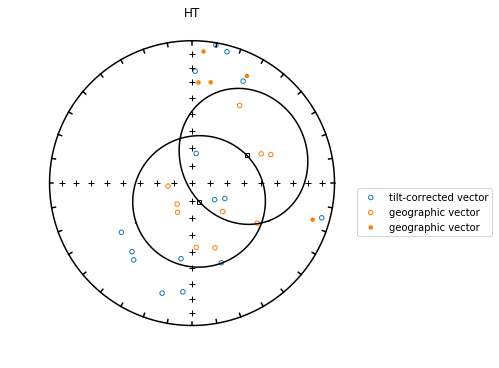

In [28]:
specimen_plot('TR012','HT')

### TR014

n vectors = 12
n planes  = 0
tilt-corrected alpha95 = 4.62
geographic     alpha95 = 4.63


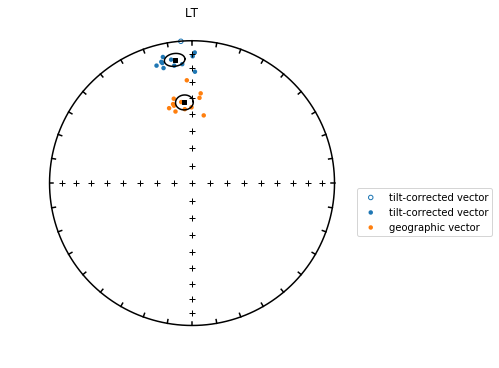

In [29]:
specimen_plot('TR014','LT')

n vectors = 12
n planes  = 0
tilt-corrected alpha95 = 12.09
geographic     alpha95 = 12.10


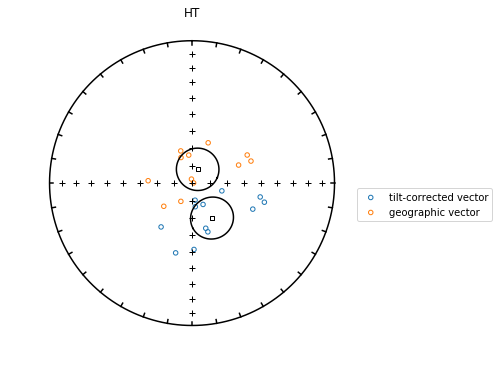

In [30]:
specimen_plot('TR014','HT')

### TR018

n vectors = 16
n planes  = 0
tilt-corrected alpha95 = 3.35
geographic     alpha95 = 3.36


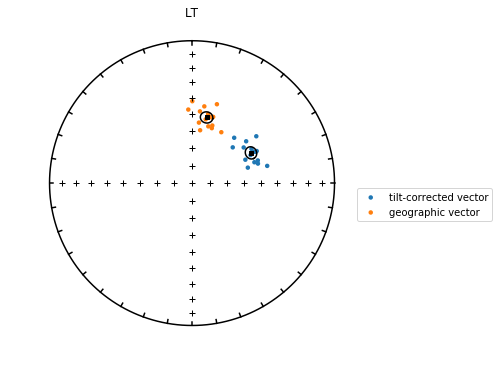

In [31]:
specimen_plot('TR018','LT')

n vectors = 8
n planes  = 6
tilt-corrected alpha95 = 12.21
geographic     alpha95 = 12.20


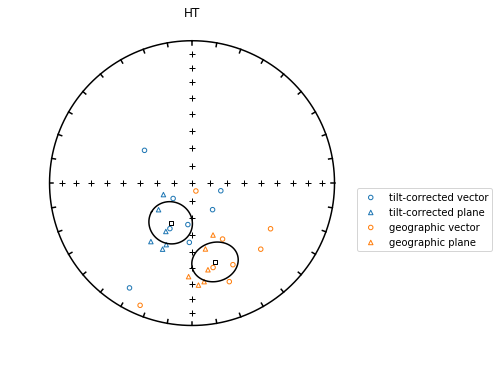

In [32]:
specimen_plot('TR018','HT')

### TR020

n vectors = 10
n planes  = 0
tilt-corrected alpha95 = 6.08
geographic     alpha95 = 6.07


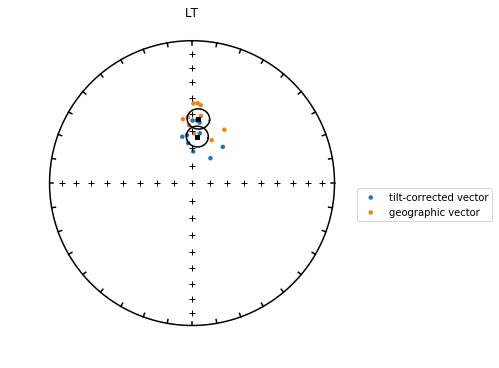

In [33]:
specimen_plot('TR020','LT')

n vectors = 9
n planes  = 1
tilt-corrected alpha95 = 10.87
geographic     alpha95 = 10.87


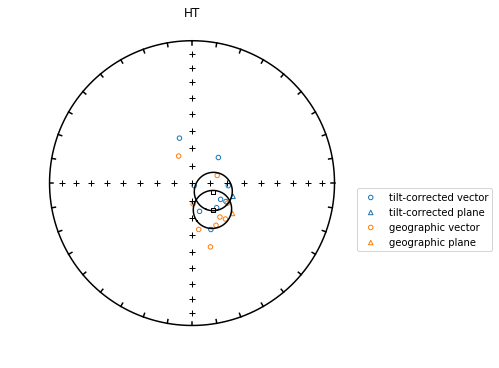

In [34]:
specimen_plot('TR020','HT')

### TR022

n vectors = 10
n planes  = 0
tilt-corrected alpha95 = 4.57
geographic     alpha95 = 4.56


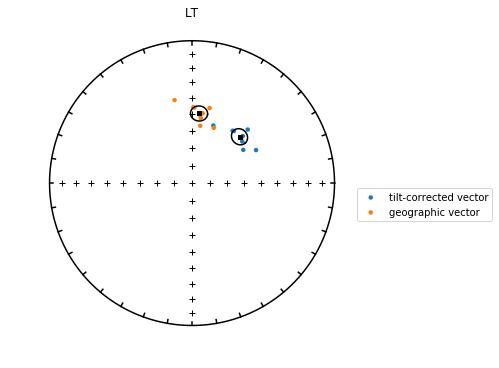

In [35]:
specimen_plot('TR022','LT')

n vectors = 6
n planes  = 1
tilt-corrected alpha95 = 42.45
geographic     alpha95 = 42.45


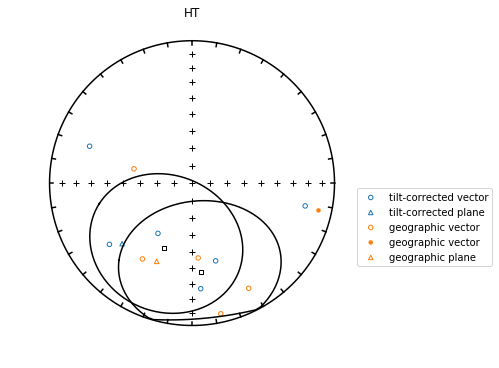

In [36]:
specimen_plot('TR022','HT')

### TR024

n vectors = 9
n planes  = 0
tilt-corrected alpha95 = 7.00
geographic     alpha95 = 7.01


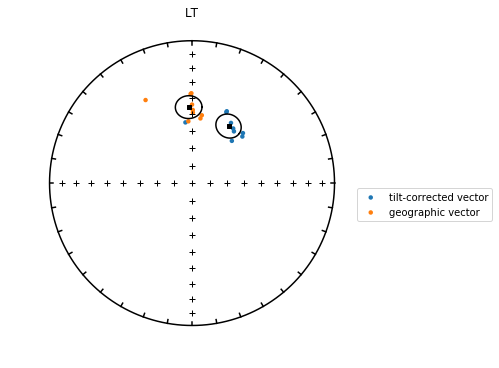

In [37]:
specimen_plot('TR024','LT')

n vectors = 9
n planes  = 0
tilt-corrected alpha95 = 18.22
geographic     alpha95 = 18.22


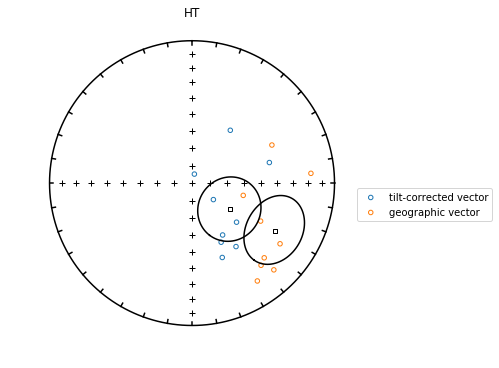

In [38]:
specimen_plot('TR024','HT')

### TR026

n vectors = 9
n planes  = 0
tilt-corrected alpha95 = 7.36
geographic     alpha95 = 7.37


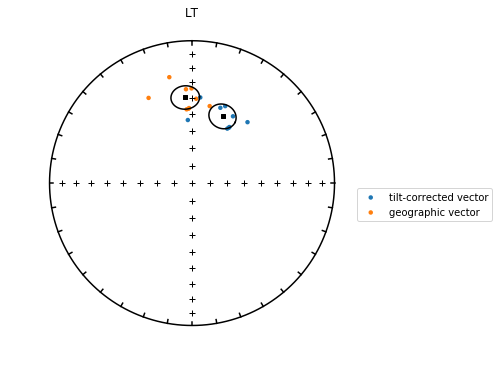

In [39]:
specimen_plot('TR026','LT')

n vectors = 9
n planes  = 0
tilt-corrected alpha95 = 15.97
geographic     alpha95 = 15.95


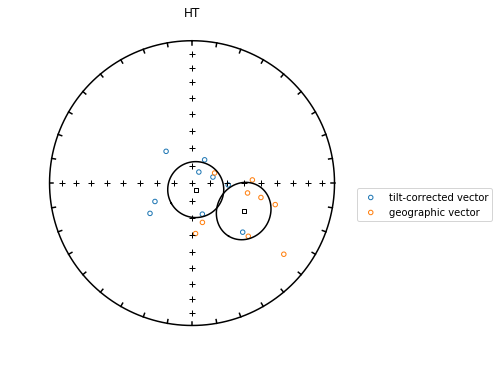

In [40]:
specimen_plot('TR026','HT')

### TR035

n vectors = 27
n planes  = 0
tilt-corrected alpha95 = 3.97
geographic     alpha95 = 3.88


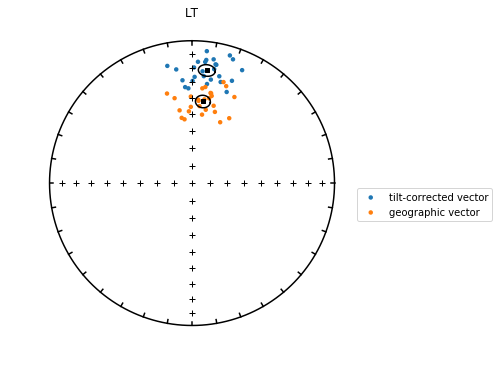

In [41]:
specimen_plot('TR035','LT')

n vectors = 17
n planes  = 2
tilt-corrected alpha95 = 14.42
geographic     alpha95 = 14.65


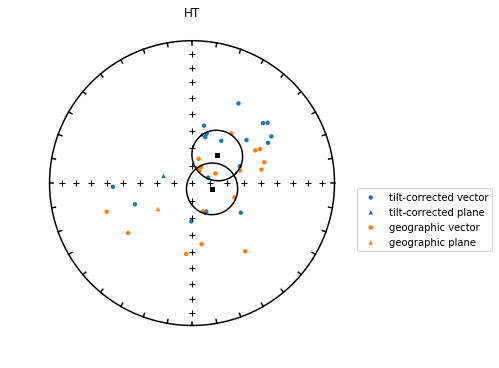

In [42]:
specimen_plot('TR035','HT')

### TR036

n vectors = 10
n planes  = 0
tilt-corrected alpha95 = 9.19
geographic     alpha95 = 9.18


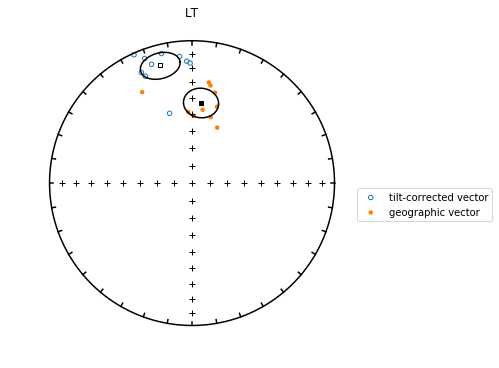

In [43]:
specimen_plot('TR036','LT')

n vectors = 2
n planes  = 2
tilt-corrected alpha95 = 53.89
geographic     alpha95 = 53.86


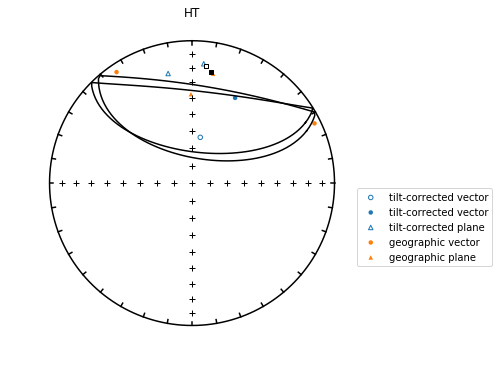

In [44]:
specimen_plot('TR036','HT')

### TR042

n vectors = 1
n planes  = 0


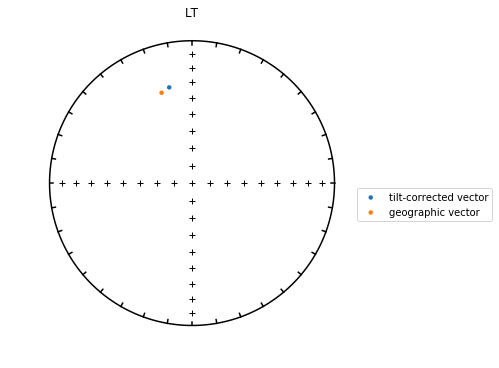

In [45]:
specimen_plot('TR042','LT')

n vectors = 14
n planes  = 0
tilt-corrected alpha95 = 11.69
geographic     alpha95 = 11.70


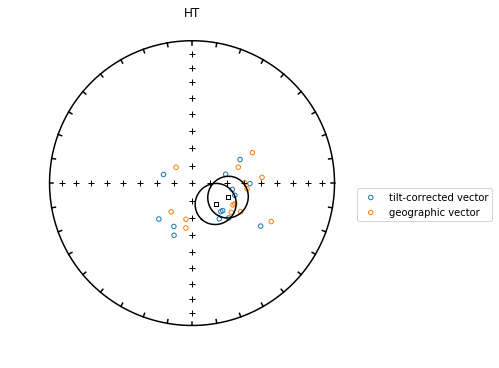

In [46]:
specimen_plot('TR042','HT')

### TR045

n vectors = 9
n planes  = 0
tilt-corrected alpha95 = 10.57
geographic     alpha95 = 10.59


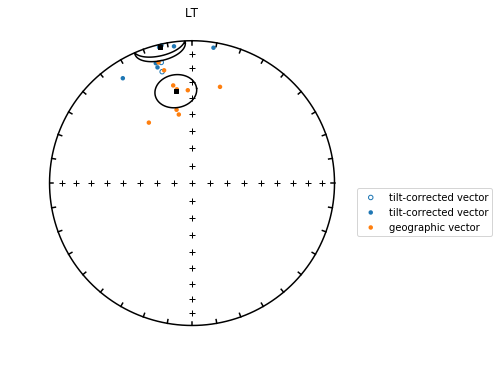

In [47]:
specimen_plot('TR045','LT')

n vectors = 9
n planes  = 4
tilt-corrected alpha95 = 30.67
geographic     alpha95 = 30.67


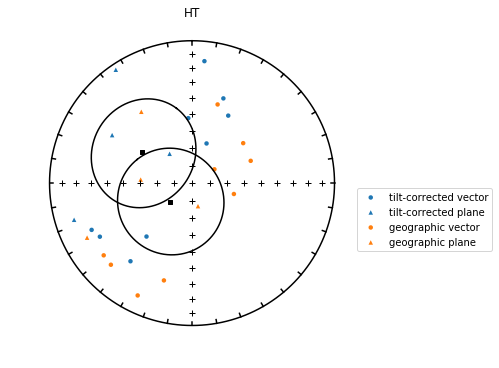

In [48]:
specimen_plot('TR045','HT')

### TR016

n vectors = 6
n planes  = 0
tilt-corrected alpha95 = 9.63
geographic     alpha95 = 9.66


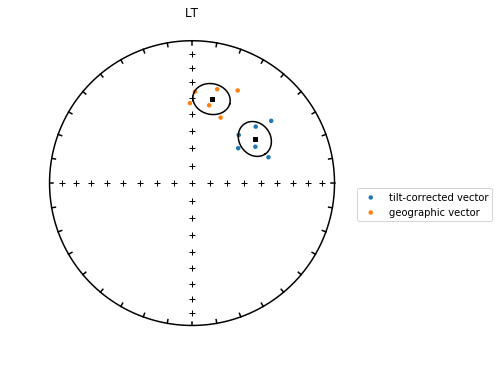

In [49]:
specimen_plot('TR016','LT')

n vectors = 7
n planes  = 0
tilt-corrected alpha95 = 23.39
geographic     alpha95 = 23.40


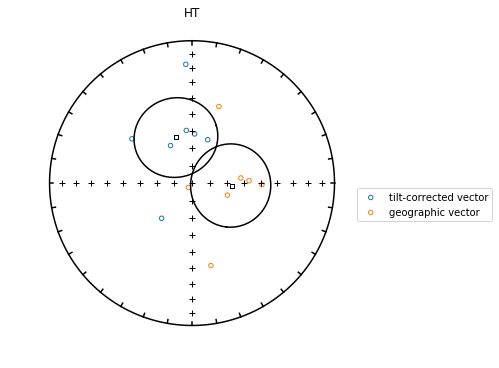

In [50]:
specimen_plot('TR016','HT')

### TR028

n vectors = 8
n planes  = 0
tilt-corrected alpha95 = 10.77
geographic     alpha95 = 10.77


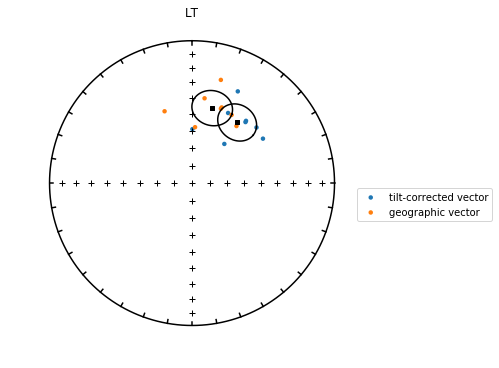

In [51]:
specimen_plot('TR028','LT')

n vectors = 4
n planes  = 1
tilt-corrected alpha95 = 12.98
geographic     alpha95 = 13.00


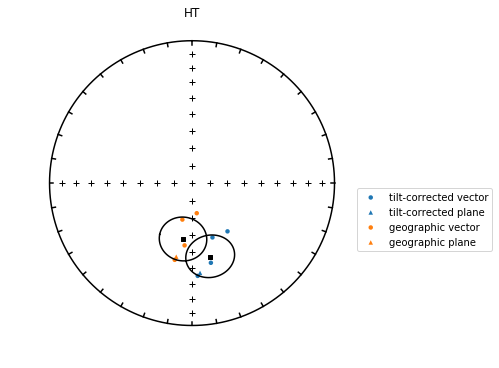

In [52]:
specimen_plot('TR028','HT')

### TR030

n vectors = 16
n planes  = 0
tilt-corrected alpha95 = 5.63
geographic     alpha95 = 5.63


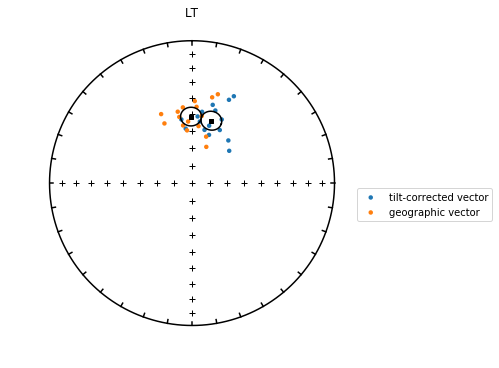

In [53]:
specimen_plot('TR030','LT')

n vectors = 4
n planes  = 0
tilt-corrected alpha95 = 34.40
geographic     alpha95 = 34.38


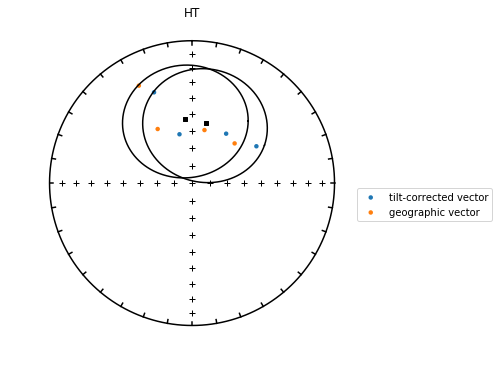

In [54]:
specimen_plot('TR030','HT')

### TR032

n vectors = 14
n planes  = 0
tilt-corrected alpha95 = 6.30
geographic     alpha95 = 6.31


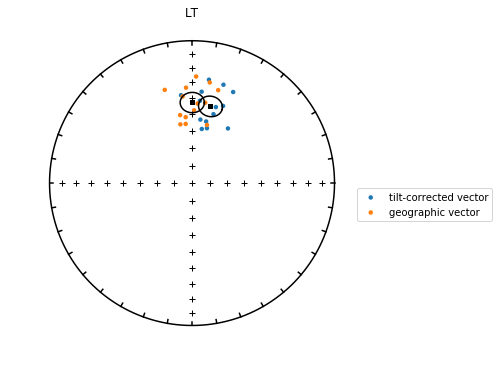

In [55]:
specimen_plot('TR032','LT')

n vectors = 3
n planes  = 3
tilt-corrected alpha95 = 18.35
geographic     alpha95 = 18.34


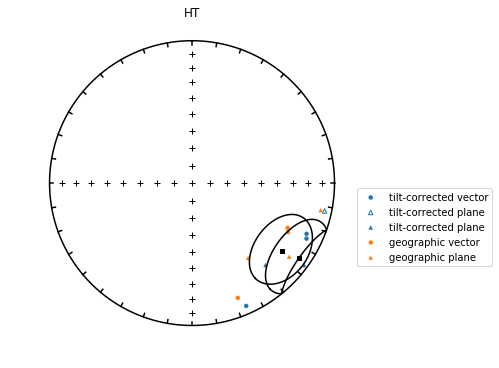

In [56]:
specimen_plot('TR032','HT')

### TR038

n vectors = 25
n planes  = 0
tilt-corrected alpha95 = 3.16
geographic     alpha95 = 3.12


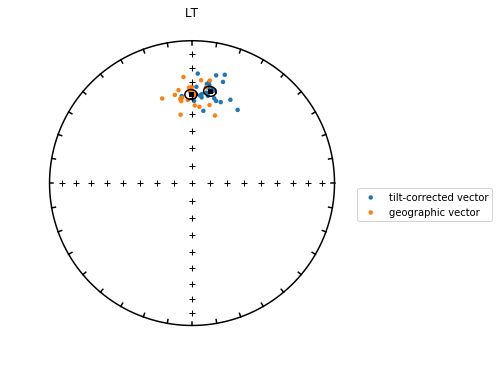

In [57]:
specimen_plot('TR038','LT')

n vectors = 15
n planes  = 4
tilt-corrected alpha95 = 23.80
geographic     alpha95 = 23.66


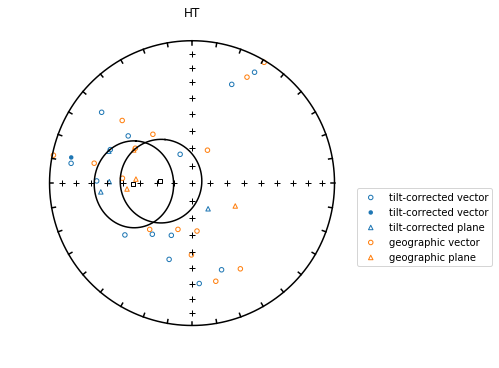

In [58]:
specimen_plot('TR038','HT')

### TR040

n vectors = 13
n planes  = 0
tilt-corrected alpha95 = 18.15
geographic     alpha95 = 18.15


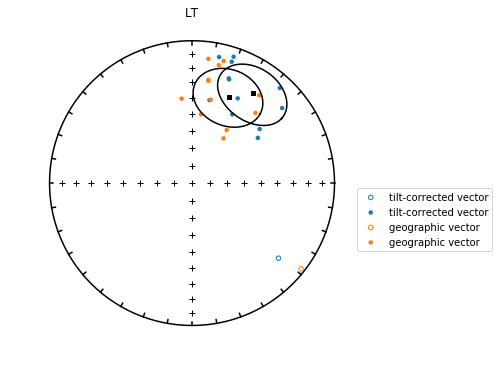

In [59]:
specimen_plot('TR040','LT')

n vectors = 14
n planes  = 0
tilt-corrected alpha95 = 36.36
geographic     alpha95 = 36.36


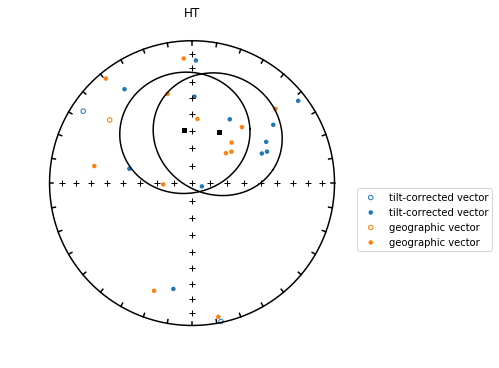

In [60]:
specimen_plot('TR040','HT')

## Site Means

In [61]:
LT = sites[sites['dir_comp_name']=='LT'].copy()
HT = sites[sites['dir_comp_name']=='HT'].copy()

LT_tc = LT[LT['dir_tilt_correction']==100]
LT_is = LT[LT['dir_tilt_correction']==0]

HT_tc = HT[HT['dir_tilt_correction']==100]
HT_is = HT[HT['dir_tilt_correction']==0]

LT_tc_dec = LT_tc['dir_dec'].tolist()
LT_tc_inc = LT_tc['dir_inc'].tolist()
LT_tc_a95 = LT_tc['dir_alpha95'].tolist()

LT_is_dec = LT_is['dir_dec'].tolist()
LT_is_inc = LT_is['dir_inc'].tolist()
LT_is_a95 = LT_is['dir_alpha95'].tolist()

HT_tc_dec = HT_tc['dir_dec'].tolist()
HT_tc_inc = HT_tc['dir_inc'].tolist()
HT_tc_a95 = HT_tc['dir_alpha95'].tolist()

HT_is_dec = HT_is['dir_dec'].tolist()
HT_is_inc = HT_is['dir_inc'].tolist()
HT_is_a95 = HT_is['dir_alpha95'].tolist()

Filter based on $\alpha_{95}$:

In [62]:
threshold = 20

good_site_list = HT_tc[HT_tc['dir_alpha95']<threshold]['site'].unique()

print('n = {}'.format(len(good_site_list)))
print(good_site_list)

n = 9
['TR002' 'TR014' 'TR018' 'TR020' 'TR024' 'TR026' 'TR035' 'TR042' 'TR028']


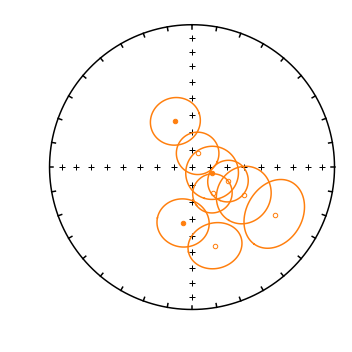

In [63]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
for i in range(len(HT_is_dec)):
    if HT_tc_a95[i]<threshold:
        ipmag.plot_di_mean(HT_is_dec[i], HT_is_inc[i], HT_is_a95[i],color='C1')
plt.show()

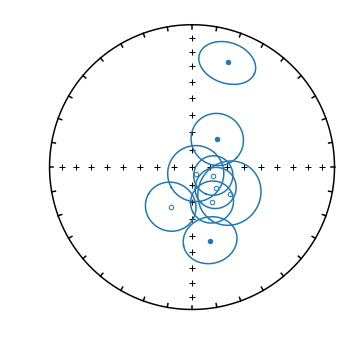

In [64]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
for i in range(len(HT_tc_dec)):
    if HT_tc_a95[i]<threshold:
        ipmag.plot_di_mean(HT_tc_dec[i], HT_tc_inc[i], HT_tc_a95[i],color='C0')
plt.show()

Build up a summary list:

TR002 and TR028 are outliers - remove them for now.

In [65]:
good_site_list = ['TR014',
                  'TR018',
                  'TR020',
                  'TR024',
                  'TR026',
                  'TR035',
                  'TR042']

good_HT_tc_dec = np.array([])
good_HT_tc_inc = np.array([])
good_HT_tc_a95 = np.array([])
good_HT_is_dec = np.array([])
good_HT_is_inc = np.array([])
good_HT_is_a95 = np.array([])

for i in range(len(good_site_list)):
    this_HT_tc = HT_tc[HT_tc['site']==good_site_list[i]]
    this_HT_is = HT_is[HT_is['site']==good_site_list[i]]
    
    good_HT_tc_dec = np.append(good_HT_tc_dec, this_HT_tc['dir_dec'].tolist())
    good_HT_tc_inc = np.append(good_HT_tc_inc, this_HT_tc['dir_inc'].tolist())
    good_HT_tc_a95 = np.append(good_HT_tc_a95, this_HT_tc['dir_alpha95'].tolist())
    
    good_HT_is_dec = np.append(good_HT_is_dec, this_HT_is['dir_dec'].tolist())
    good_HT_is_inc = np.append(good_HT_is_inc, this_HT_is['dir_inc'].tolist())
    good_HT_is_a95 = np.append(good_HT_is_a95, this_HT_is['dir_alpha95'].tolist())

Add TR004 manually, since it was a dual polarity site:

In [66]:
good_HT_tc_dec = np.append(good_HT_tc_dec, TR004a_tc_HT_mean['dec'])
good_HT_tc_inc = np.append(good_HT_tc_inc, TR004a_tc_HT_mean['inc'])
good_HT_tc_a95 = np.append(good_HT_tc_a95, TR004a_tc_HT_mean['alpha95'])

good_HT_is_dec = np.append(good_HT_is_dec, TR004a_is_HT_mean['dec'])
good_HT_is_inc = np.append(good_HT_is_inc, TR004a_is_HT_mean['inc'])
good_HT_is_a95 = np.append(good_HT_is_a95, TR004a_is_HT_mean['alpha95'])

good_HT_tc_dec = np.append(good_HT_tc_dec, TR004b_tc_HT_mean['dec'])
good_HT_tc_inc = np.append(good_HT_tc_inc, TR004b_tc_HT_mean['inc'])
good_HT_tc_a95 = np.append(good_HT_tc_a95, TR004b_tc_HT_mean['alpha95'])

good_HT_is_dec = np.append(good_HT_is_dec, TR004b_is_HT_mean['dec'])
good_HT_is_inc = np.append(good_HT_is_inc, TR004b_is_HT_mean['inc'])
good_HT_is_a95 = np.append(good_HT_is_a95, TR004b_is_HT_mean['alpha95'])

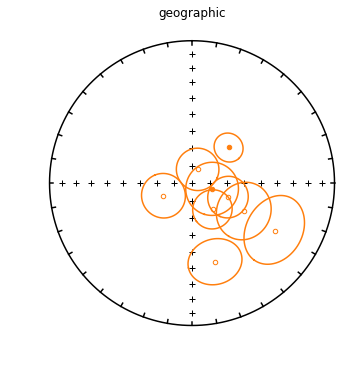

In [67]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
for i in range(len(good_HT_is_dec)):
    ipmag.plot_di_mean(good_HT_is_dec[i], good_HT_is_inc[i], good_HT_is_a95[i], color='C1')
plt.title('geographic')
plt.show()

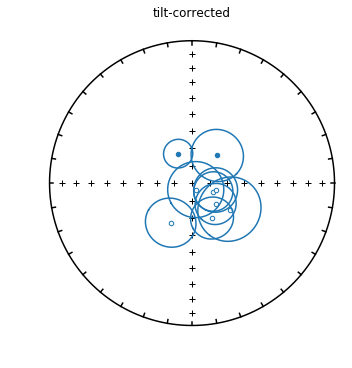

In [68]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
for i in range(len(good_HT_tc_dec)):
    ipmag.plot_di_mean(good_HT_tc_dec[i], good_HT_tc_inc[i], good_HT_tc_a95[i], color='C0')
plt.title('tilt-corrected')
plt.show()

In [69]:
good_HT_is_inc_flipped = []
good_HT_is_dec_flipped = []
good_HT_tc_inc_flipped = []
good_HT_tc_dec_flipped = []

for i in range(len(good_HT_tc_dec)):
    if good_HT_tc_inc[i] > 0:
        good_HT_is_inc_flipped.append(-good_HT_is_inc[i])
        good_HT_is_dec_flipped.append(good_HT_is_dec[i]+180)
        good_HT_tc_inc_flipped.append(-good_HT_tc_inc[i])
        good_HT_tc_dec_flipped.append(good_HT_tc_dec[i]+180)
    else:
        good_HT_is_inc_flipped.append(good_HT_is_inc[i])
        good_HT_is_dec_flipped.append(good_HT_is_dec[i])
        good_HT_tc_inc_flipped.append(good_HT_tc_inc[i])
        good_HT_tc_dec_flipped.append(good_HT_tc_dec[i])

good_HT_tc_mean = ipmag.fisher_mean(good_HT_tc_dec_flipped,good_HT_tc_inc_flipped)
good_HT_is_mean = ipmag.fisher_mean(good_HT_is_dec_flipped,good_HT_is_inc_flipped)

ipmag.print_direction_mean(good_HT_tc_mean)
print('')
ipmag.print_direction_mean(good_HT_is_mean)

Dec: 154.1  Inc: -75.5
Number of directions in mean (n): 9
Angular radius of 95% confidence (a_95): 9.1
Precision parameter (k) estimate: 33.2

Dec: 149.7  Inc: -72.7
Number of directions in mean (n): 9
Angular radius of 95% confidence (a_95): 18.7
Precision parameter (k) estimate: 8.5


In [70]:
ipmag.lat_from_inc(good_HT_tc_mean['inc'])

-62.716454666174066

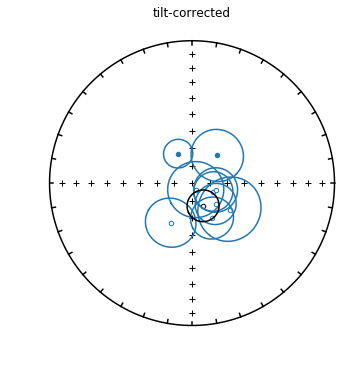

In [71]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
for i in range(len(good_HT_tc_dec)):
    ipmag.plot_di_mean(good_HT_tc_dec[i], good_HT_tc_inc[i], good_HT_tc_a95[i], color='C0')
ipmag.plot_di_mean(good_HT_tc_mean['dec'], good_HT_tc_mean['inc'], good_HT_tc_mean['alpha95'], color='k')
plt.title('tilt-corrected')
plt.show()

## Fold Test

### Specimens

In [ ]:
fold_test_decs = np.array([])
fold_test_incs = np.array([])
fold_test_dip_dir = np.array([])
fold_test_dip = np.array([])

# round 1
PM_data1_specimen_HT = PM_data1_specimens[(PM_data1_specimens['dir_comp']=='HT1')&\
                                          (PM_data1_specimens['dir_tilt_correction']==0)&\
                                          (PM_data1_specimens['site']=='TR014')].copy()
PM_data1_specimen_HT.reset_index(drop=True, inplace=True)
for i in range(len(PM_data1_specimen_HT.index)):
    for j in range(len(PM_data1_samples.index)):
        if PM_data1_specimen_HT['sample'][i] == PM_data1_samples['sample'][j]:
            fold_test_decs = np.append(fold_test_decs, PM_data1_specimen_HT['dir_dec'][i])
            fold_test_incs = np.append(fold_test_incs, PM_data1_specimen_HT['dir_inc'][i])
            fold_test_dip_dir = np.append(fold_test_dip_dir, PM_data1_samples['bed_dip_direction'][j])
            fold_test_dip = np.append(fold_test_dip, PM_data1_samples['bed_dip'][j])
            break

# round 2
PM_data2_specimen_HT = PM_data2_specimens[(PM_data2_specimens['dir_comp']=='HT1')&\
                                          (PM_data2_specimens['dir_tilt_correction']==0)&\
                                          ((PM_data2_specimens['site']=='TR018')|\
                                           (PM_data2_specimens['site']=='TR020')|\
                                           (PM_data2_specimens['site']=='TR024')|\
                                           (PM_data2_specimens['site']=='TR026')|\
                                           (PM_data2_specimens['site']=='TR035')|\
                                           (PM_data2_specimens['site']=='TR042'))].copy()
PM_data2_specimen_HT.reset_index(drop=True, inplace=True)
for i in range(len(PM_data2_specimen_HT.index)):
    for j in range(len(PM_data2_samples.index)):
        if PM_data2_specimen_HT['sample'][i] == PM_data2_samples['sample'][j]:
            fold_test_decs = np.append(fold_test_decs, PM_data2_specimen_HT['dir_dec'][i])
            fold_test_incs = np.append(fold_test_incs, PM_data2_specimen_HT['dir_inc'][i])
            fold_test_dip_dir = np.append(fold_test_dip_dir, PM_data2_samples['bed_dip_direction'][j])
            fold_test_dip = np.append(fold_test_dip, PM_data2_samples['bed_dip'][j])
            break
            
for i in range(len(fold_test_dip_dir)):
    if fold_test_dip_dir[i]>360:
        fold_test_dip_dir[i]=fold_test_dip_dir[i]-360
        
fold_test_array = ipmag.make_diddd_array(fold_test_decs,fold_test_incs,fold_test_dip_dir,fold_test_dip)

In [ ]:
ipmag.bootstrap_fold_test(fold_test_array)

### Sites

TR035 uses different beddings through the site... not included in analysis for now. The rest of the sites have a single bedding for the whole site.

In [ ]:
fold_test_decs = np.array([])
fold_test_incs = np.array([])
fold_test_dip_dir = np.array([])
fold_test_dip = np.array([])

# round 1
PM_data1_HT = PM_data1[(PM_data1['dir_comp_name']=='HT1')&\
                       (PM_data1['dir_tilt_correction']==0)&\
                       (PM_data1['site']=='TR014')].copy()
PM_data1_HT.reset_index(drop=True, inplace=True)
for i in range(len(PM_data1_HT.index)):
    for j in range(len(PM_data1_samples.index)):
        if PM_data1_HT['site'][i] == PM_data1_samples['site'][j]:
            fold_test_decs = np.append(fold_test_decs, PM_data1_HT['dir_dec'][i])
            fold_test_incs = np.append(fold_test_incs, PM_data1_HT['dir_inc'][i])
            fold_test_dip_dir = np.append(fold_test_dip_dir, PM_data1_samples['bed_dip_direction'][j])
            fold_test_dip = np.append(fold_test_dip, PM_data1_samples['bed_dip'][j])
            break
            
# round 2
PM_data2_HT = PM_data2[(PM_data2['dir_comp_name']=='HT1')&\
                       (PM_data2['dir_tilt_correction']==0)&\
                       ((PM_data2['site']=='TR018')|\
                        (PM_data2['site']=='TR020')|\
                        (PM_data2['site']=='TR024')|\
                        (PM_data2['site']=='TR026')|\
                        (PM_data2['site']=='TR042'))].copy()
PM_data2_HT.reset_index(drop=True, inplace=True)
for i in range(len(PM_data2_HT.index)):
    for j in range(len(PM_data2_samples.index)):
        if PM_data2_HT['site'][i] == PM_data2_samples['site'][j]:
            fold_test_decs = np.append(fold_test_decs, PM_data2_HT['dir_dec'][i])
            fold_test_incs = np.append(fold_test_incs, PM_data2_HT['dir_inc'][i])
            fold_test_dip_dir = np.append(fold_test_dip_dir, PM_data2_samples['bed_dip_direction'][j])
            fold_test_dip = np.append(fold_test_dip, PM_data2_samples['bed_dip'][j])
            break
            
fold_test_array = ipmag.make_diddd_array(fold_test_decs,fold_test_incs,fold_test_dip_dir,fold_test_dip)

In [ ]:
ipmag.bootstrap_fold_test(fold_test_array)

### Luoman Local Fold Test

In [ ]:
fold_test_decs = np.array([])
fold_test_incs = np.array([])
fold_test_dip_dir = np.array([])
fold_test_dip = np.array([])

Luoman2_specimen_HT = PM_data2_specimens[(PM_data2_specimens['dir_comp']=='HT1')&\
                                         (PM_data2_specimens['dir_tilt_correction']==0)&\
                                         ((PM_data2_specimens['site']=='TR035')|\
                                          (PM_data2_specimens['site']=='TR036')|\
                                          (PM_data2_specimens['site']=='TR042'))].copy()
Luoman2_specimen_HT.reset_index(drop=True, inplace=True)
for i in range(len(Luoman2_specimen_HT.index)):
    for j in range(len(PM_data2_samples.index)):
        if Luoman2_specimen_HT['sample'][i] == PM_data2_samples['sample'][j]:
            fold_test_decs = np.append(fold_test_decs, Luoman2_specimen_HT['dir_dec'][i])
            fold_test_incs = np.append(fold_test_incs, Luoman2_specimen_HT['dir_inc'][i])
            fold_test_dip_dir = np.append(fold_test_dip_dir, PM_data2_samples['bed_dip_direction'][j])
            fold_test_dip = np.append(fold_test_dip, PM_data2_samples['bed_dip'][j])
            break
            
for i in range(len(fold_test_dip_dir)):
    if fold_test_dip_dir[i]>360:
        fold_test_dip_dir[i]=fold_test_dip_dir[i]-360
        
fold_test_array = ipmag.make_diddd_array(fold_test_decs,fold_test_incs,fold_test_dip_dir,fold_test_dip)

In [ ]:
ipmag.bootstrap_fold_test(fold_test_array)

## Maps

In [ ]:
from mpl_toolkits.basemap import Basemap
import numpy as np

In [ ]:
PM_data2_HT_tc.index

In [ ]:
PM_data2_vgp_lat = []
PM_data2_vgp_lon = []

for i in PM_data2_HT_tc.index:
    if PM_data2_HT_tc.dir_inc[i] > 0:
        PM_data2_vgp_lat.append(PM_data2_HT_tc.vgp_lat[i])
        PM_data2_vgp_lon.append(PM_data2_HT_tc.vgp_lon[i])
    else:
        PM_data2_vgp_lat.append(-PM_data2_HT_tc.vgp_lat[i])
        PM_data2_vgp_lon.append(PM_data2_HT_tc.vgp_lon[i]-180)
        
PM_data2_pole = ipmag.fisher_mean(dec=PM_data2_vgp_lon,inc=PM_data2_vgp_lat)
ipmag.print_pole_mean(PM_data2_pole)

In [ ]:
PM_data2_vgp_lat

In [ ]:
# initiate the figure
plt.figure(figsize=(6, 6))
pmap = Basemap(projection='ortho',lat_0=35,lon_0=140,
               resolution='c',area_thresh=50000)
pmap.drawcoastlines(linewidth=0.25)
pmap.fillcontinents(color='bisque',lake_color='white',zorder=1)
pmap.drawmapboundary(fill_color='white')
pmap.drawmeridians(np.arange(0,360,30))
pmap.drawparallels(np.arange(-90,90,30))

ipmag.plot_vgp(pmap,vgp_lon=PM_data2_vgp_lon,vgp_lat=PM_data2_vgp_lat)
        

plt.show()

In [ ]:
ipmag.lat_from_pole(PM_data2_HT_tc.lon[2],PM_data2_HT_tc.lat[2],PM_data2_pole['dec'],PM_data2_pole['inc'])

In [ ]:
PM_data2_HT_tc.site